Chapter 7 Decision Tree

reference : https://scikit-learn.org/stable/modules/tree.html

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

ในตัวอย่างนี้จะทำการสร้าง decision tree จากชุดข้อมูลสำหรับการทำนายผลจากโรคเบาหวานว่าผู้ป่วยเสียชีวิตหรือไม่ โดยใช้ข้อมูล 2 คุณลักษณะ ได้เเก่ อายุ (age) เเละ ความดันเลือด (bp) โดยอ้างอิงข้อมูลจาก


https://raw.githubusercontent.com/Kanabadee-KDS/basic-ml-dataset/main/suffering-diabetes-Data.csv

อ่านข้อมูลเเละเเสดงข้อมูล 5 ตัวอย่างเเรกเพื่อตรวจสอบข้อมูล

In [4]:
df=pd.read_csv('https://raw.githubusercontent.com/nawinpoyen7/MachineLearning/main/DataSet/DataChange.csv')
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,1,0,22,0,1,1,0,4,3,D
1,462643,0,1,38,1,3,1,1,3,3,A
2,466315,0,1,67,1,3,1,0,1,5,B
3,461735,1,1,67,1,5,0,2,2,5,B
4,462669,0,1,40,1,2,1,2,6,5,A


เเสดงคุณสมบัติของข้อมูลเพื่อตรวจสอบว่ามีข้อมูลสูญหาย หรือ ขาดหายบางส่วนหรือไม่ โดยตรวจสอบจากจำนวนตัวอย่าง (หรือเเถวทั้งหมด)ของข้อมูล เเละจำนวนตัวอย่างในเเต่ละคุณลักษณะ หากไม่เท่ากันเเสดงว่าเกิดการขาดหายของข้อมูล

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               8068 non-null   int64 
 1   Gender           8068 non-null   int64 
 2   Ever_Married     8068 non-null   int64 
 3   Age              8068 non-null   int64 
 4   Graduated        8068 non-null   int64 
 5   Profession       8068 non-null   int64 
 6   Work_Experience  8068 non-null   int64 
 7   Spending_Score   8068 non-null   int64 
 8   Family_Size      8068 non-null   int64 
 9   Var_1            8068 non-null   int64 
 10  Segmentation     8068 non-null   object
dtypes: int64(10), object(1)
memory usage: 693.5+ KB


เเสดงหัวข้อในเเต่ละคอลัมน์ของฐานข้อมูล

In [6]:
df.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

**สร้างการเรียนรู้เเบบ Decision tree**

นำเข้าคลาสของ tree เเละ train_test_split จาก scikit learn โดย

In [7]:
from sklearn.model_selection import train_test_split
from sklearn import tree

กำหนดคุณลักษณะในการเรียนรู้ เเละ คุณลักษณะของผลลัพธ์ จากนั้นทำการเเบ่งข้อมูลสำหรับการเรียนรู้เเละทดสอบ

In [8]:
feature_cols=['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession', 'Spending_Score', 'Family_Size']
target_col='Segmentation'
X=df[feature_cols]
y=df[target_col]

test_size=.3
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=test_size, random_state=7)

สร้างแบบจำลอง Decision tree

In [9]:
# default ของ sklearn จะพิจารณาการสร้างเเผนภาพต้นไม้ด้วย Gini index 
# โดยสามารถเลือกเกณฑ์การพิจารณาด้วยการกำหนดพารามิเตอร์ criterion
model = tree.DecisionTreeClassifier() 

เเสดงพารามิเตอร์สำหรับการสร้างแบบจำลอง decision tree 

In [10]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

ทดลองกำหนดค่าพารามิเตอร์ โดยกำหนดให้เกณฑ์การพิจารณาโดยใช้ gini index เเละกำหนดขนาดจำนวนการเเตกเเผนภาพได้ดังนี้

In [11]:
params={'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
#  'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}
model=tree.DecisionTreeClassifier(**params)

สร้างแบบจำลอง

In [12]:
model = model.fit(X_train, y_train)

In [13]:
model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

ทดลองเเสดงค่าความสำคัญของเเต่ละคุณลักษณะ โดย

In [14]:
# print('column_name',X_train.columns)
# model.feature_importances_
fs = pd.Series(model.feature_importances_, index=X_train.columns.sort_values(ascending=True))
fs

Age               0.000000
Ever_Married      0.000000
Family_Size       0.577728
Gender            0.000000
Graduated         0.242942
Profession        0.179330
Spending_Score    0.000000
dtype: float64

ทดลองดูค่าผิดพลาดของแบบจำลองที่สร้างขึ้นโดยใช้ค่า $R^2$

In [48]:
model.score(X_train, y_train)

0.4954843279617496

In [49]:
model.score(X_test, y_test)

0.5059892606361008

In [17]:
model.__dict__

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': 3,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'random_state': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'class_weight': None,
 'presort': 'deprecated',
 'ccp_alpha': 0.0,
 'n_features_': 7,
 'n_outputs_': 1,
 'classes_': array(['A', 'B', 'C', 'D'], dtype=object),
 'n_classes_': 4,
 'max_features_': 7,
 'tree_': <sklearn.tree._tree.Tree at 0xbc559d0>}

ทดลองเเสดงเเผนภาพของ Decision tree ที่สร้างขึ้น

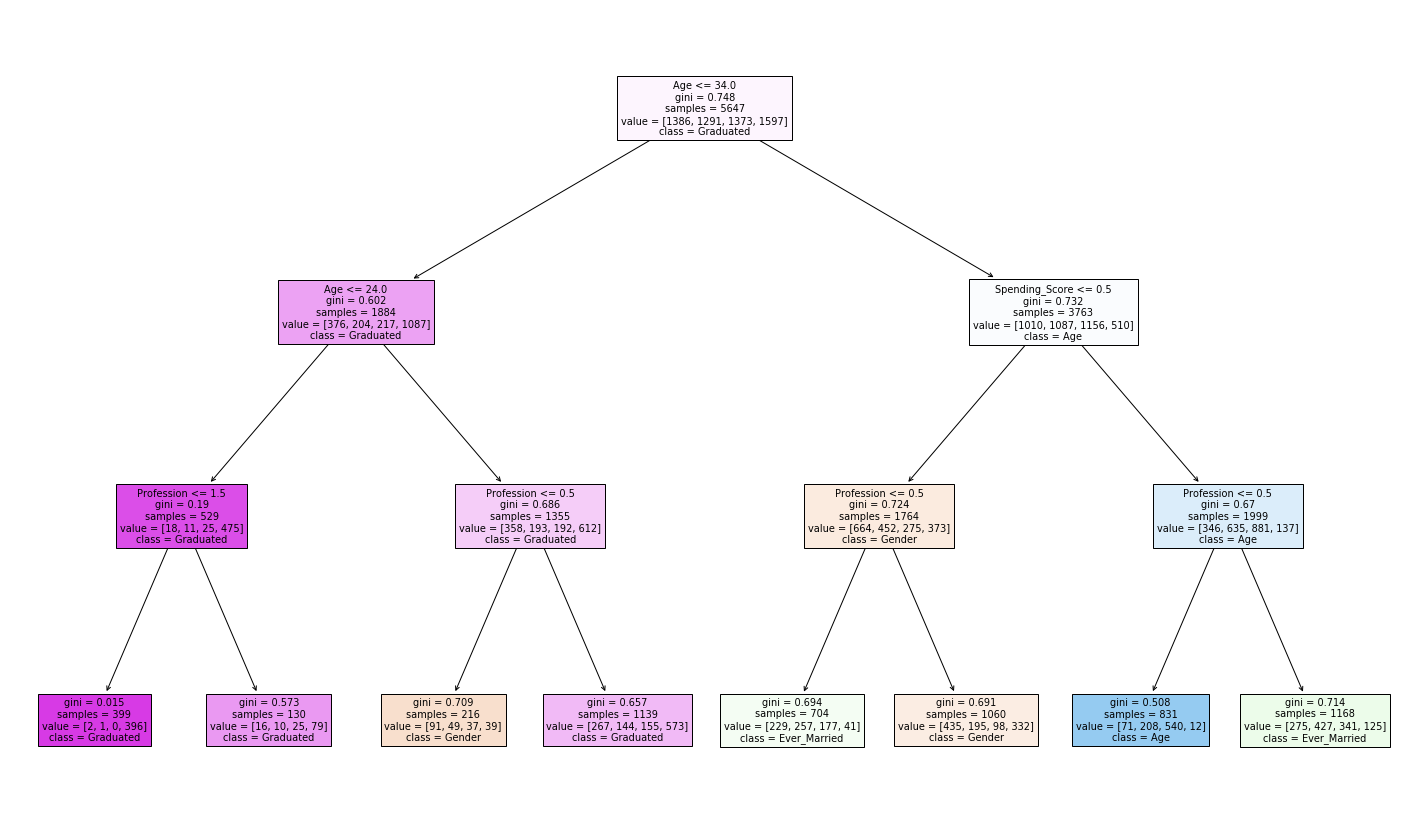

In [51]:
fig = plt.figure(figsize=(25,15))
_ = tree.plot_tree(model,feature_names= feature_cols,class_names=['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession', 'Spending_Score', 'Family_Size'],
                   filled=True)

In [52]:
from sklearn.tree import export_graphviz
from graphviz import Digraph, Source

def view_tree(model, feature_names, save_tree_img=False):
    estimators=model
    dot_graph=export_graphviz(estimators, 
                feature_names = feature_names,
                class_names = ['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession', 'Spending_Score', 'Family_Size'],
                rounded = True, proportion = False, 
                precision = 2, filled = True, special_characters=True
                             )
    g=Source(dot_graph)    
    if save_tree_img:
        g.render(f'tree', format='png', view=False, cleanup=True)
    return g

In [53]:
view_tree(model, feature_cols, False)

ExecutableNotFound: failed to execute 'dot', make sure the Graphviz executables are on your systems' PATH

In [54]:
from sklearn import metrics
predicted = model.predict(X_test)
print(f'accuracy = {metrics.accuracy_score(y_test, predicted)}')
print(f'precision = {metrics.precision_score(y_test, predicted)}')
print(f'recall = {metrics.recall_score(y_test, predicted)}')

accuracy = 0.5059892606361008


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].